In [140]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [141]:
class TDZeroAgent:
    """Tabular TD(0) for estimating v_pi"""
    def __init__(self, n_states):
        self.alpha = None
        self.gamma = None
        self.values = np.zeros(n_states)
        self.last_state = None

    def start(self, state):
        self.last_state = state

    def step(self, state, reward):
        delta = reward + self.gamma * self.values[state] - self.values[self.last_state]
        self.values[self.last_state] += self.alpha * delta
        self.last_state = state

    def end(self, reward):
        delta = reward - self.values[self.last_state]
        self.values[self.last_state] += self.alpha * delta

In [139]:
class RandomWalk:

    def __init__(self):
        self.state = None

    def start(self):
        self.state = 2
        done = False
        return self.state, done

    def step(self):
        self.state += np.random.choice([-1, 1])
        reward = 1 if self.state == 5 else 0
        done = True if (self.state == -1) or (self.state == 5) else False
        self.state = None if (self.state == -1) or (self.state == 5) else self.state
        return self.state, reward, done

In [150]:
true_values = np.array([1/6, 2/6, 3/6, 4/6, 5/6])

def plot(values):
    plt.figure(figsize=(4, 3))
    plt.plot(values, marker='o', markersize=3, linewidth=1, color='royalblue', label='Estimate')
    plt.plot(true_values, marker='o', markersize=3, linewidth=1, color='grey', alpha=0.5, label='True')
    plt.xticks(range(5), ['A', 'B', 'C', 'D', 'E'])
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.ylim(0, 0.9)
    plt.legend()
    plt.show()

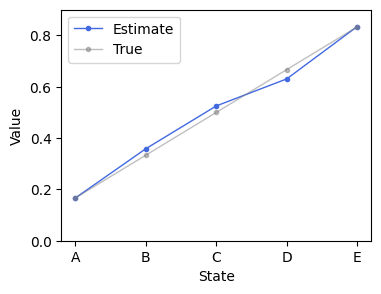

In [152]:
env = RandomWalk()
agent = TDZeroAgent(n_states=5)
agent.alpha = 0.1
agent.gamma = 1
agent.values += 0.5

for _ in range(100):
    state, done = env.start()
    agent.start(state)
    while not done:
        state, reward, done = env.step()
        if done:
            agent.end(reward)
        else:
            agent.step(state, reward)
    plot(agent.values)
    clear_output(wait=True)